In [31]:
# %%
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [32]:
# 1. Tải dữ liệu
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [33]:
# 2. Xây dựng mô hình CNN cải tiến
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),     # 28→14

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),     # 14→7

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Flatten(),               # 7×7×128 = 6272

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),            # tránh overfitting
    layers.Dense(10, activation='softmax')
])

d:\ComputerVision2025\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# 3. Biên dịch và huấn luyện
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=7, validation_data=(x_test, y_test))

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8443 - loss: 0.4305 - val_accuracy: 0.8937 - val_loss: 0.2956
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9010 - loss: 0.2731 - val_accuracy: 0.8996 - val_loss: 0.2791
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9162 - loss: 0.2296 - val_accuracy: 0.9054 - val_loss: 0.2559
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9259 - loss: 0.2005 - val_accuracy: 0.9160 - val_loss: 0.2260
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9366 - loss: 0.1725 - val_accuracy: 0.9134 - val_loss: 0.2386
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9431 - loss: 0.1519 - val_accuracy: 0.9135 - val_loss: 0.2391
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9514 - loss: 0.1292 - val_accuracy: 0.9133 - val_loss: 0.2560


In [40]:
# 4. Đánh giá
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Độ chính xác trên tập kiểm tra: {test_acc*100:.2f}%")

313/313 - 1s - 4ms/step - accuracy: 0.9133 - loss: 0.2560
Độ chính xác trên tập kiểm tra: 91.33%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


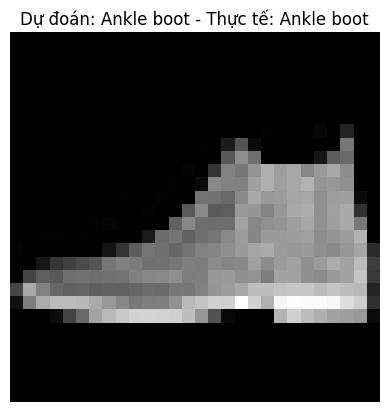

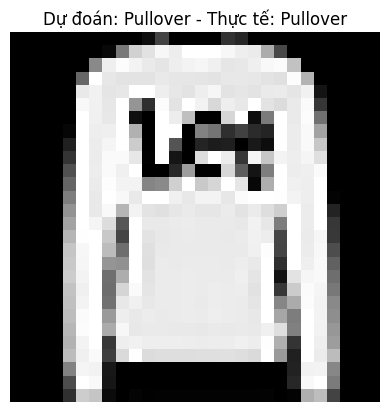

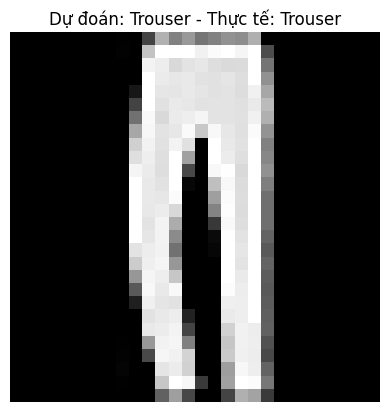

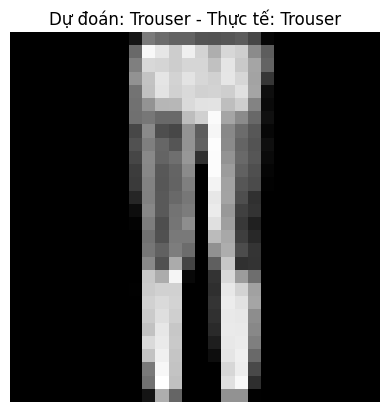

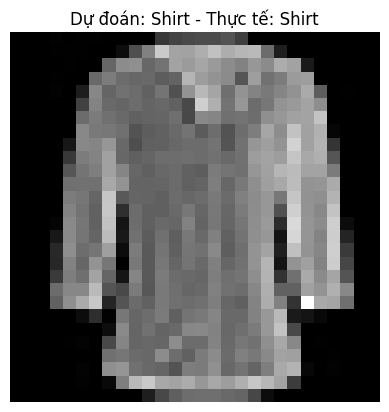

In [36]:
#-------------------------------Thử nghiệm với ảnh --------------------------------#
# %%
import numpy as np
import matplotlib.pyplot as plt

# Dự đoán xác suất các lớp
predictions = model.predict(x_test)
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
# Hàm tìm lớp có xác suất cao nhất
def predict_label(i):
    pred = np.argmax(predictions[i])
    true = y_test[i]
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Dự đoán: {class_names[pred]} - Thực tế: {class_names[true]}")
    plt.axis('off')
    plt.show()

# Thử 5 ảnh đầu tiên
for i in range(5):
    predict_label(i)

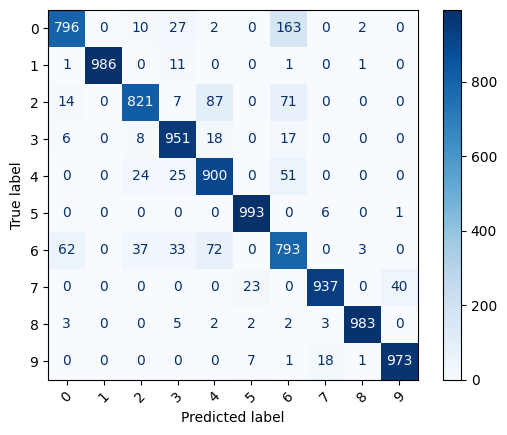

In [37]:
# Ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

In [38]:
# -----------------------Dự đoán với ảnh tùy chọn----------------------------#
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_custom_image(path):
    img = image.load_img(path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = 1 - img_array # Đảo màu nếu cần thiết, vì ảnh gốc có nền trắng và ảnh huấn luyện có nền đen
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    pred_label = np.argmax(prediction)

    plt.imshow(img, cmap='gray')
    plt.title(f"Dự đoán: {class_names[pred_label]}")
    plt.axis('off')
    plt.show()

    for i, name in enumerate(class_names):
        print(f"{name:15s}: {prediction[0][i]*100:.2f}%")




class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


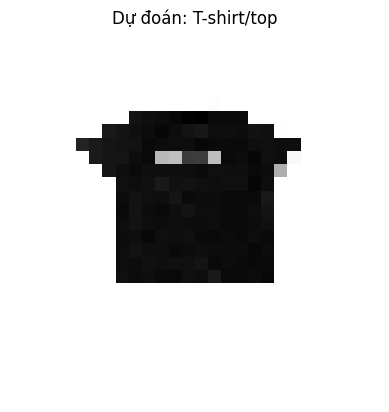

T-shirt/top    : 97.02%
Trouser        : 0.00%
Pullover       : 0.00%
Dress          : 0.00%
Coat           : 0.00%
Sandal         : 0.00%
Shirt          : 2.85%
Sneaker        : 0.00%
Bag            : 0.13%
Ankle boot     : 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


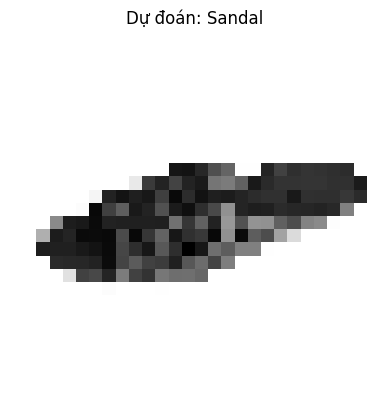

T-shirt/top    : 0.00%
Trouser        : 0.00%
Pullover       : 0.00%
Dress          : 0.00%
Coat           : 0.00%
Sandal         : 99.35%
Shirt          : 0.00%
Sneaker        : 0.65%
Bag            : 0.00%
Ankle boot     : 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


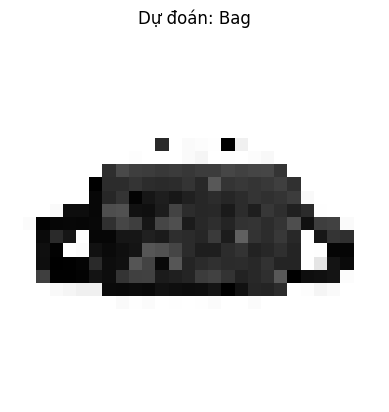

T-shirt/top    : 0.02%
Trouser        : 0.00%
Pullover       : 0.01%
Dress          : 0.00%
Coat           : 0.02%
Sandal         : 0.08%
Shirt          : 0.00%
Sneaker        : 0.06%
Bag            : 99.81%
Ankle boot     : 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


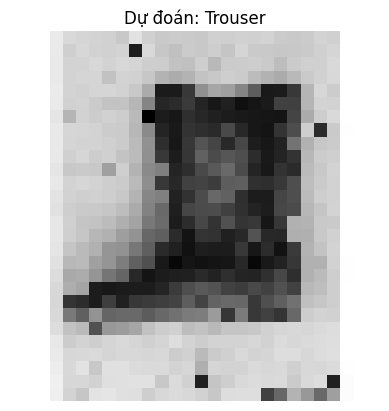

T-shirt/top    : 1.19%
Trouser        : 58.34%
Pullover       : 1.18%
Dress          : 11.66%
Coat           : 4.28%
Sandal         : 0.10%
Shirt          : 7.70%
Sneaker        : 0.74%
Bag            : 1.69%
Ankle boot     : 13.12%


In [39]:
predict_custom_image('img/test9.jpg')
predict_custom_image('img/test22.png')
predict_custom_image('img/test15.jpg')
predict_custom_image('img/test14.jpg')

                     
                     